# Phonon Bath Code

In [22]:
using Plots
using QuadGK

In [39]:
######### Model/simulation parameters
t𝑝=2 #phonon bandwidth
tB=3 #bath bandwidth= = σ
a1=1  #lattice constant
λ= 1 #phonon-bath coupling

T𝑝=0.6# phonon temperature
Tb=0.1


#time-simulation parameters
h= 0.08 #the time spacing
Time_max = 50 #the net time
N𝑡= Int64(Time_max/h) #


#phonon volume parameters
sitenum = 20 #gives the no. of sites in the lattice
a2=2*π*(1/(sitenum*a1)) #reciprocal space lattice constant
V_ph = collect(-0.5*sitenum*a2:a2:0.5*a2*(sitenum+1))
#filter!(e->e!=0,V_ph) # not taking k=0 mode currently

21-element Array{Float64,1}:
 -3.141592653589793
 -2.827433388230814
 -2.5132741228718345
 -2.199114857512855
 -1.8849555921538759
 -1.5707963267948966
 -1.2566370614359172
 -0.9424777960769379
 -0.6283185307179586
 -0.3141592653589793
  0.0
  0.3141592653589793
  0.6283185307179586
  0.9424777960769379
  1.2566370614359172
  1.5707963267948966
  1.8849555921538759
  2.199114857512855
  2.5132741228718345
  2.827433388230814
  3.141592653589793

In [40]:
#Phonon definitions

### Disperion relation
function ω𝑝(k)
    return t𝑝*abs(sin(V_ph[k]*a1*0.5))+0.5
end


### Definition of Bare D_0, Dzerobar, and D_zero_K
function D₀ᴿ(k,t1,t2)
    if t1>t2
        return (-(1)*sin(ω𝑝(k)*(t1-t2)*h))/(ω𝑝(k))     # the equal to case shall give 0
    else
        return 0
    end
end

function D̄₀ᴿ(k,t1,t2)
    if t1>=t2                            ### What does D̄ do at equal times? produce 1? What if it rigorously doesn't hold?
        return (-1*cos(ω𝑝(k)*(t1-t2)*h))
    else
        return 0
    end                     #remember this is only true if t1>t2
end


function D₀ᴷ(k,t,t1,Tphonon)
    a= (-im)*(cos(ω𝑝(k)*(t-t1)*h) * coth(ω𝑝(k)*0.5/(Tphonon)) )* (1/ω𝑝(k))
    return a
end

function D̄₀ᴷ(k,t,t1,Tphonon)
    return im*sin(ω𝑝(k)*(t-t1)*h)*coth(ω𝑝(k)*0.5/(Tphonon))
end

D̄₀ᴷ (generic function with 1 method)

In [41]:
Dᴿmatrix = Array{Array{ComplexF64,2},1}(undef,length(V_ph)+2)

D̄ᴿmatrix = Array{Array{ComplexF64,2},1}(undef,length(V_ph)+2)

Dᴷmatrix = Array{Array{ComplexF64,2},1}(undef,length(V_ph)+2)

D̄ᴷmatrix = Array{Array{ComplexF64,2},1}(undef,length(V_ph)+2)

Σ𝑝ᴿ = Array{ComplexF64,2}(undef,N𝑡+5,N𝑡+5)

Σ𝑝ᴷ = Array{ComplexF64,2}(undef,N𝑡+5,N𝑡+5)

630×630 Array{Complex{Float64},2}:
      -1.0+0.0im        0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 -0.980067+0.0im       -1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 -0.921214+0.0im  -0.980067+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 -0.980359+0.0im  -0.999847+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 -0.921329+0.0im  -0.979475+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 -0.980014+0.0im  -0.998572+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 -0.920263+0.0im  -0.977321+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 -0.978046+0.0im  -0.995416+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 -0.917265+0.0im  -0.973101+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 -0.973979+0.0im  -0.990143+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 -0.912138+0.0im  -0.966832+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 -0.967874+0.0im  -0.982982+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 -0.905156+0.0im  -0.958901+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
          ⋮                        ⋱                   

In [42]:
matinit = function ()
    for i=1:length(V_ph)+2
        Dᴿmatrix[i] = Array{ComplexF64,2}(undef,N𝑡+5,N𝑡+5)
        D̄ᴿmatrix[i] = Array{ComplexF64,2}(undef,N𝑡+5,N𝑡+5)
        Dᴷmatrix[i] = Array{ComplexF64,2}(undef,N𝑡+5,N𝑡+5)
        D̄ᴷmatrix[i] = Array{ComplexF64,2}(undef,N𝑡+5,N𝑡+5)
    end
end

#15 (generic function with 1 method)

## Convolutions

In [43]:

function F(k,t₁,t₂)
    if t₁>t₂
        return sum(t->Σ𝑝ᴿ[t₁,t]*Dᴿmatrix[k][t,t₂]*h, collect(t₂:t₁))
    elseif t₁==t₂
        return 0
    else
        return "You're convoluting in the opposite direction. Possible error at RR conv"
    end
end

function RK(k,t1,t2) #∫₀ᵗ Σ𝑝ᴿ⋅Dᴷ
    if t1>1
        return sum(t->Σ𝑝ᴿ[t1,t]*Dᴷmatrix[k][t,t2]*h, collect(1:t1))
    else
        return 0
    end
end

function KA(k,t1,t2) #∫₀⋅Dᴿ
    if t2>1
        return sum(t->Σ𝑝ᴷ[t1,t]*Dᴿmatrix[k][t2,t] * h, collect(1:t2)) ## Dᴬ is just transpose of Dᴿ
    else
        return 0
    end
end


KA (generic function with 1 method)

In [44]:

boxinitindex=2

boxinit=function()

    for k =1:length(V_ph)
        for i=1:N𝑡
            Dᴿmatrix[k][i,i]=0 #exactly 0
            D̄ᴿmatrix[k][i,i]=-1 #exactly
        end
    end

    ######## Box Initialization ############

    #GF Initialization

    for k=1:length(V_ph)
        for i=1:boxinitindex
            for j=1:boxinitindex
                Dᴿmatrix[k][i,j] = D₀ᴿ(k,i,j)
                D̄ᴿmatrix[k][i,j] = D̄₀ᴿ(k,i,j)
                Dᴷmatrix[k][i,j] = D₀ᴷ(k,i,j,T𝑝)
                D̄ᴷmatrix[k][i,j] = D̄₀ᴷ(k,i,j,T𝑝)
            end
        end
    end
end



#23 (generic function with 1 method)

In [45]:
# function Σᴿ(t1,t2)
#     if abs(t1-t2)!=0
#         return -1/2*(1/√π)*λ^2*(tB^3)*((t1-t2)*ϵ)*exp(-1/4*tB^2*(t1-t2)^2*ϵ^2)
#     else
#         return 0            #return "equal time error"???
#     end
# end

Σᴿ(t1,t2) = -1/2* (1/(√π))* λ^2 * (tB^3) * ((t1-t2)*h) * exp(-1/4*(tB^2)* ((t1-t2)^2) * (h^2) )

Σᴷ(ω,t) = 2*(λ^2)*ω*exp(-0.5*(ω^2/tB^2))*coth(ω/(2*Tb))*cos(ω*t)

function Σᴷ(t)
    dω=4*tB/(100)
    steps = collect(-2*tB:dω:2*tB)
    filter!(e->e!=0,steps)
    result=Float64
    result=0
    for ω in steps
        result = result + Σᴷ(ω,t)*dω
    end
    return (result/(2π))*im
end

Σᴷ (generic function with 2 methods)

In [46]:
### Code to update the Sigma R, Sigma K matrix

for i=1:N𝑡
    Σ𝑝ᴿ[i,1] = Σᴿ(i,1)
end

for j=2:N𝑡
    for i=j:N𝑡
        Σ𝑝ᴿ[i,j] = Σ𝑝ᴿ[i-j+1,1]
    end
end


for i=1:N𝑡
    Σ𝑝ᴷ[i,1] = Σᴷ(i-1)
end

for i=1:N𝑡
    Σ𝑝ᴷ[1,i] = Σᴷ(1-i)
end

for j=1:N𝑡
    for i=j:N𝑡
        Σ𝑝ᴷ[i,j] = Σ𝑝ᴷ[i-j+1,1]
    end
end

for j=1:N𝑡
    for i=j:N𝑡
        Σ𝑝ᴷ[j,i] = Σ𝑝ᴷ[1,i-j+1]
    end
end

In [47]:
matinit()
boxinit()
#Actual for loop
testrange=100
for i=boxinitindex:testrange         ### The diagonal value #should probably start from 2

    #Update DR
    for k=1:length(V_ph)
        for j=1:i
            if j<i
                D̄ᴿmatrix[k][i,j] = ω𝑝(k)^2 * D₀ᴿ(k,i,i-1) * Dᴿmatrix[k][i-1,j] - D̄₀ᴿ(k,i,i-1) * D̄ᴿmatrix[k][i-1,j] + (h/2)*( D̄₀ᴿ(k,i,i)* F(k,i,j) + D̄₀ᴿ(k,i,i-1) * F(k,i-1,j) )
            end
            Dᴿmatrix[k][i+1,j] = D̄₀ᴿ(k,i+1,i) * Dᴿmatrix[k][i,j] + D₀ᴿ(k,i+1,i) * D̄ᴿmatrix[k][i,j] + (h/2)*D₀ᴿ(k,i+1,i)*F(k,i,j)
        end
    end

     #Update DK
     for k = 1:length(V_ph)
         for j=1:i
             D̄ᴷmatrix[k][i,j] = ω𝑝(k)^2 * D₀ᴿ(k,i,i-1) * Dᴷmatrix[k][i-1,j] - D̄₀ᴿ(k,i,i-1) * D̄ᴷmatrix[k][i-1,j] + (h/2)*(  D̄₀ᴿ(k,i,i)* RK(k,i,j) + D̄₀ᴿ(k,i,i-1)* RK(k,i-1,j) + D̄₀ᴿ(k,i,i)* KA(k,i,j) + D̄₀ᴿ(k,i,i-1)* KA(k,i-1,j) )
             Dᴷmatrix[k][i+1,j] = D̄₀ᴿ(k,i+1,i) * Dᴷmatrix[k][i,j] + D₀ᴿ(k,i+1,i) * D̄ᴷmatrix[k][i,j] + (h/2)*( D₀ᴿ(k,i+1,i)* RK(k,i,j) + D₀ᴿ(k,i+1,i)* KA(k,i,j) )
             Dᴷmatrix[k][j,i+1] = -conj(Dᴷmatrix[k][i+1,j])
             D̄ᴷmatrix[k][j,i] = +conj(D̄ᴷmatrix[k][i,j])#what abt i,i entry? If Dk is imaginary, then it will just flip sign here.....? This term is to take care of that...Not sure
         end
     end

    ############## Diagonal terms update #############

    #Update DK(t+ϵ,t+ϵ) here, D̄(i,i) block is calculated already
    for k=1:length(V_ph)
        D̄ᴷmatrix[k][i+1,i] = ω𝑝(k)^2 * D₀ᴿ(k,i+1,i) * Dᴷmatrix[k][i,i] - D̄₀ᴿ(k,i+1,i) * D̄ᴷmatrix[k][i,i] + (h/2)*(  D̄₀ᴿ(k,i+1,i+1)* RK(k,i+1,i) + D̄₀ᴿ(k,i+1,i)* RK(k,i,i) + D̄₀ᴿ(k,i+1,i+1)* KA(k,i+1,i) + D̄₀ᴿ(k,i+1,i)* KA(k,i,i) )
        D̄ᴷmatrix[k][i,i+1] = conj( D̄ᴷmatrix[k][i+1,i] )
        Dᴷmatrix[k][i+1,i+1] = D̄₀ᴿ(k,i+1,i) * Dᴷmatrix[k][i,i+1] + D₀ᴿ(k,i+1,i) * D̄ᴷmatrix[k][i,i+1] + (h/2)*( D₀ᴿ(k,i+1,i)* RK(k,i,i+1) + D₀ᴿ(k,i+1,i)* KA(k,i,i+1) )
    end

end

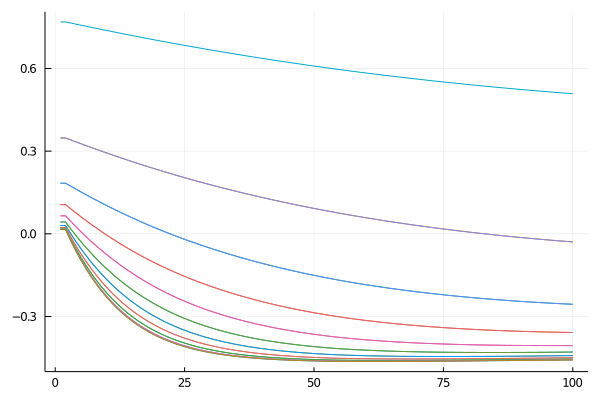

In [48]:
b2=[]
boxinitindex
testrange
list=[1 10]
for m=1:length(V_ph)
    b = Array{ComplexF64}(undef,testrange)
    for i=1:testrange
        #b[i] = Gᴿmatrix[m][i,1]
        b[i] = (real(im*Dᴷmatrix[m][i,i])*ω𝑝(m)-1)*0.5
        #b[i] = Gᴷmatrix[m][i,i]
        #println(testrange)
    end
    push!(b2,b)
end

b2
ser = collect(1:testrange)
plot(ser,real.(b2), legend=false)#title = "T = $(T𝑝), μbath = $(μbath), μelectron = $(μ)",lw=1)#label="Tbath = $(Temp_bath)",

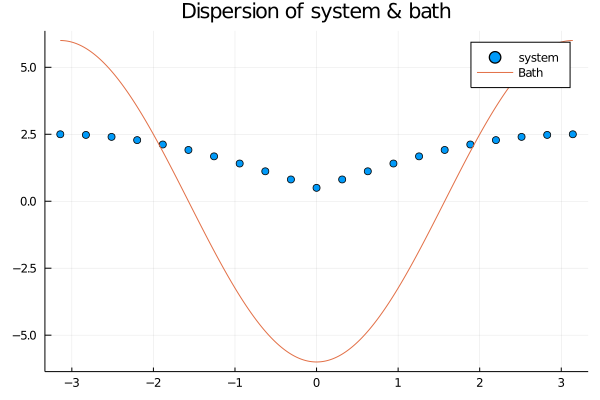

In [50]:
disp_phonon= []
for m=1:length(V_ph)
    push!(disp_phonon,ω𝑝(m))
end

x=collect(-π/a1:a2:π/a1)
y=collect(-π/a1:a2*1e-2:π/a1)
scatter(x,disp_phonon,label="system")
plot!(y, 2*-tB*cos.(y.*a1),title = "Dispersion of system & bath",label="Bath")